In [3]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from tqdm import tqdm
from scipy import stats
import networkx as nx
import seaborn as sns
import re
import sys
sys.path.append("../scripts/")
from nn_check_randomization_simple_mlp_new import *
from itertools import combinations

plt.style.use("../config/custom_plt.mplstyle")

plt.rc('text', usetex=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%%time 

dataset = 'MNIST'
hidden_size = [64]
num_samples_per_class = 100000

all_fraction_non_zero = [1]
sparsification_levels = [1 - x for x in all_fraction_non_zero]

res = {}
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for a, b in tqdm(combinations(digits, 2)):
    all_res = []

    for i in tqdm(range(10)):
        path = f'/home/rjankow/data/task_complexity/fix_accuracy/corrected_all/output_mnist_classes_{a}_{b}_dim_{hidden_size[0]}_n_{num_samples_per_class}_i{i}/'
        tmp_res = randomize_mlp(9, path, [a, b], num_samples_per_class, 
                            hidden_size, dataset, verbose=False, sparsification_levels=sparsification_levels)
        all_res.append(tmp_res)
        
    res[(a, b)] = all_res

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:25<00:00,  2.58s/it]
1it [00:25, 25.84s/it]
100%|██████████| 10/10 [00:23<00:00,  2.33s/it]
2it [00:49, 24.38s/it]
100%|██████████| 10/10 [00:26<00:00,  2.64s/it]
3it [01:15, 25.31s/it]
100%|██████████| 10/10 [00:25<00:00,  2.51s/it]
4it [01:40, 25.24s/it]
100%|██████████| 10/10 [00:26<00:00,  2.67s/it]
5it [02:07, 25.76s/it]
100%|██████████| 10/10 [00:22<00:00,  2.22s/it]
6it [02:29, 24.56s/it]
100%|██████████| 10/10 [00:22<00:00,  2.27s/it]
7it [02:52, 23.95s/it]
100%|██████████| 10/10 [00:22<00:00,  2.22s/it]
8it [03:14, 23.41s/it]
100%|██████████| 10/10 [00:22<00:00,  2.24s/it]
9it [03:37, 23.09s/it]
100%|██████████| 10/10 [00:23<00:00,  2.36s/it]
10it [04:00, 23.25s/it]
100%|██████████| 10/10 [00:23<00:00,  2.38s/it]
11it [04:24, 23.42s/it]
100%|██████████| 10/10 [00:24<00:00,  2.41s/it]
12it [04:48, 23.62s/it]
100%|██████████| 10/10 [00:23<00:00,  2.33s/it]
13it [05:11, 23.53s/it]
100%|██████████| 10/10 [00:24<00:00,  2.40s/it]
14it [

100%|██████████| 10/10 [00:22<00:00,  2.26s/it]
29it [11:21, 22.67s/it]
100%|██████████| 10/10 [00:22<00:00,  2.27s/it]
30it [11:44, 22.68s/it]
100%|██████████| 10/10 [00:21<00:00,  2.17s/it]
31it [12:06, 22.38s/it]
100%|██████████| 10/10 [00:22<00:00,  2.22s/it]
32it [12:28, 22.33s/it]
100%|██████████| 10/10 [00:22<00:00,  2.27s/it]
33it [12:51, 22.45s/it]
100%|██████████| 10/10 [00:22<00:00,  2.24s/it]
34it [13:13, 22.44s/it]
100%|██████████| 10/10 [00:22<00:00,  2.24s/it]
35it [13:35, 22.43s/it]
100%|██████████| 10/10 [00:21<00:00,  2.18s/it]
36it [13:57, 22.23s/it]
100%|██████████| 10/10 [00:22<00:00,  2.24s/it]
37it [14:20, 22.27s/it]
100%|██████████| 10/10 [00:22<00:00,  2.20s/it]
38it [14:42, 22.19s/it]
100%|██████████| 10/10 [00:21<00:00,  2.18s/it]
39it [15:03, 22.08s/it]
100%|██████████| 10/10 [00:22<00:00,  2.26s/it]
40it [15:26, 22.23s/it]
100%|██████████| 10/10 [00:22<00:00,  2.22s/it]
41it [15:48, 22.23s/it]
100%|██████████| 10/10 [00:22<00:00,  2.26s/it]
42it [16:11, 22.

CPU times: user 5h 1min 43s, sys: 33.8 s, total: 5h 2min 16s
Wall time: 17min 19s


In [23]:
np.median([res[(0, 1)][x][2][0]['random_pos_neg'] for x in range(10)])

np.float64(70.54373522458629)

In [30]:
acc_original_mlp = {}
acc_shuffled_mlp = {}
acc_diff_mlp = {}

for a, b in combinations(digits, 2):
    org_acc = np.median([res[(a, b)][x][0][0] for x in range(10)])
    shuffled_acc = np.median([res[(a, b)][x][2][0]['random_pos_neg'] for x in range(10)])
    
    if org_acc < 50:
        org_acc = 100 - org_acc
    if shuffled_acc < 50:
        shuffled_acc = 100 - shuffled_acc
        
    acc_original_mlp[(a, b)] = org_acc
    acc_shuffled_mlp[(a, b)] = shuffled_acc
    acc_diff_mlp[(a, b)] = org_acc - shuffled_acc

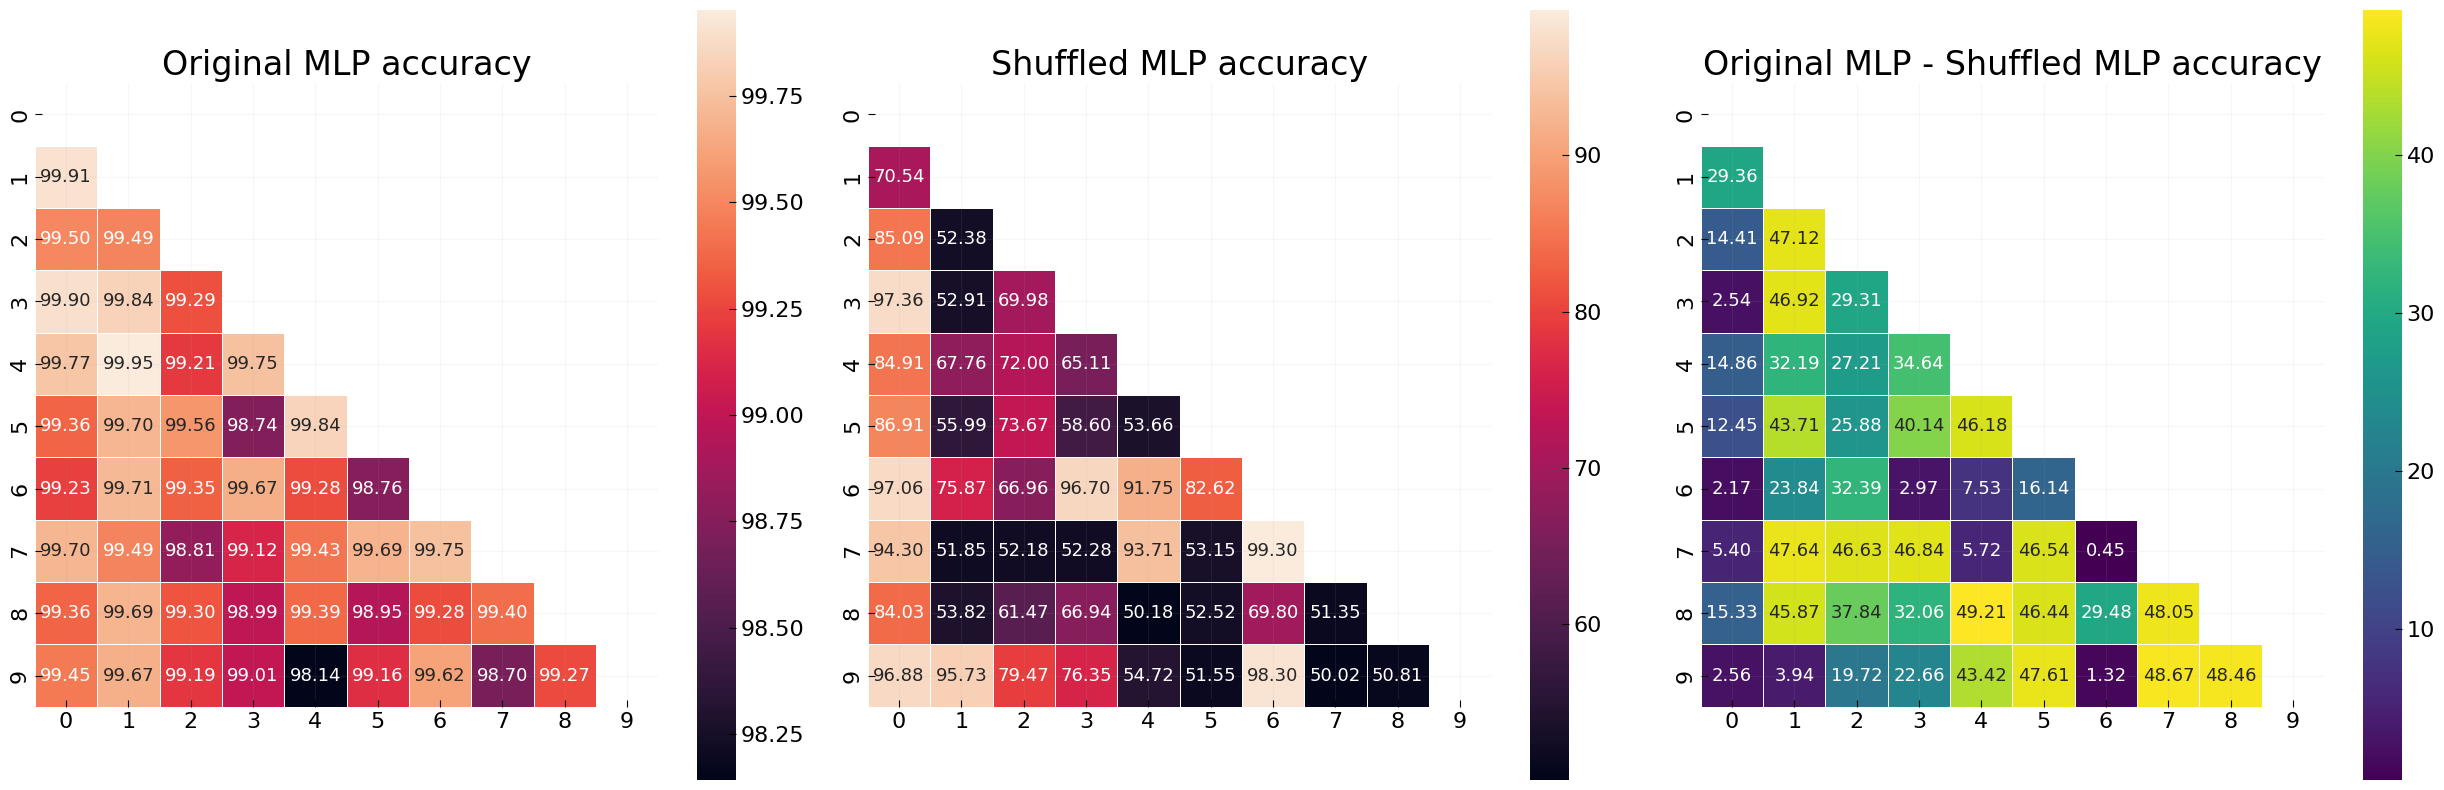

In [31]:
data_list = [acc_original_mlp, acc_shuffled_mlp, acc_diff_mlp]
titles = ["Original MLP accuracy", "Shuffled MLP accuracy", "Original MLP - Shuffled MLP accuracy"]

all_pairs = [pair for d in data_list for pair in d.keys()]
indices = sorted(set([i for i, j in all_pairs] + [j for i, j in all_pairs]))
n = max(indices) + 1

fig, axes = plt.subplots(1, 3, figsize=(25, 8))

for idx, (ax, data, title) in enumerate(zip(axes, data_list, titles)):
    mat = np.full((n, n), np.nan)
    for (i, j), val in data.items():
        mat[i, j] = val
        mat[j, i] = val
    mask = np.triu(np.ones_like(mat, dtype=bool), k=0)
    df = pd.DataFrame(mat, index=indices, columns=indices)
    
    cmap = "viridis" if idx == 2 else None

    sns.heatmap(
        df, mask=mask, annot=True, fmt=".2f",
        cmap=cmap, cbar=True, annot_kws={'size': 13},
        square=True, linewidths=.5, ax=ax
    )
    ax.set_title(title)
    
plt.tight_layout()

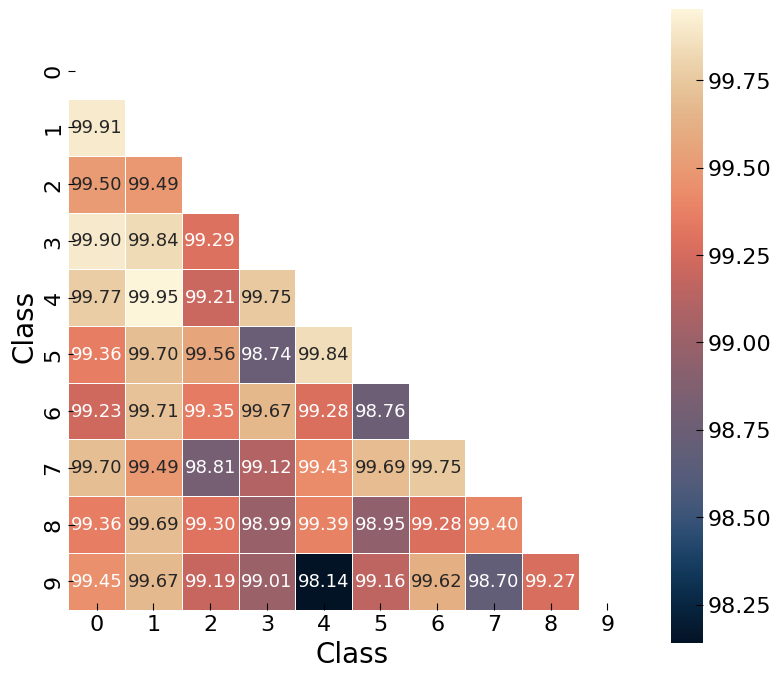

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cmcrameri

data = acc_original_mlp
title = r""


all_pairs   = list(data.keys())
indices     = sorted({i for i,j in all_pairs} | {j for i,j in all_pairs})
n           = max(indices) + 1

mat = np.full((n, n), np.nan)
for (i, j), val in data.items():
    mat[i, j] = val
    mat[j, i] = val

mask = np.triu(np.ones((n, n), dtype=bool), k=0)
df   = pd.DataFrame(mat, index=indices, columns=indices)

# Plot
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(
    df, mask=mask, annot=True, fmt=".2f",
    cmap=cmcrameri.cm.lipari,    # use the Lipari colormap
    cbar=True, annot_kws={'size':13},
    square=True, linewidths=.5, ax=ax
)
ax.grid(False)
ax.set_title(title)
ax.set_xlabel("Class")
ax.set_ylabel("Class")
plt.tight_layout()

# plt.savefig("../plots/paper/mnist_accuracy_heatmap_all_digits.pdf")

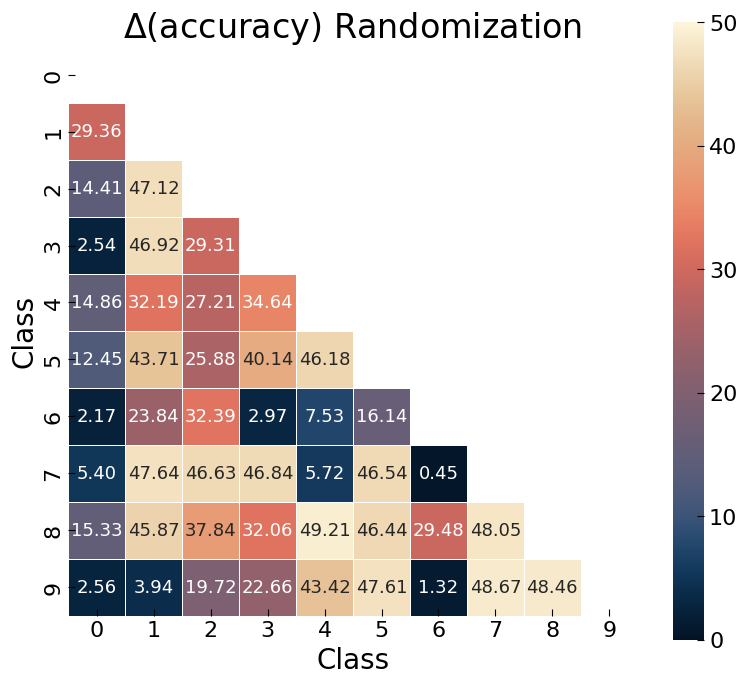

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cmcrameri

data = acc_diff_mlp
title = r"$\Delta$(accuracy) Randomization"


all_pairs   = list(data.keys())
indices     = sorted({i for i,j in all_pairs} | {j for i,j in all_pairs})
n           = max(indices) + 1

mat = np.full((n, n), np.nan)
for (i, j), val in data.items():
    mat[i, j] = val
    mat[j, i] = val

mask = np.triu(np.ones((n, n), dtype=bool), k=0)
df   = pd.DataFrame(mat, index=indices, columns=indices)

# Plot
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(
    df, mask=mask, annot=True, fmt=".2f",
    cmap=cmcrameri.cm.lipari,    # use the Lipari colormap
    cbar=True, annot_kws={'size':13},
    square=True, linewidths=.5, ax=ax, vmin=0, vmax=50
)
ax.grid(False)
ax.set_title(title)
ax.set_xlabel("Class")
ax.set_ylabel("Class")
plt.tight_layout()


# plt.savefig("../plots/paper/mnist_accuracy_heatmap_diff_randomization.pdf")
# plt.savefig("../plots/paper/mnist_accuracy_heatmap_diff_randomization.png", dpi=300)

In [47]:
# import pickle

# with open("acc_shuffled_mlp_data.pickle", 'wb') as f:
#     pickle.dump(acc_diff_mlp, f)